In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
# Keras stuff 
import keras as ks
from keras.layers import Lambda

# read in file

import scipy.signal as signal
from scipy.io import wavfile

#do FFT because indecies will be the same length of the file ??

# Copied from: https://www.kaggle.com/davids1992/speech-representation-and-data-exploration

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
#import librosa.display

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import pandas as pd


Using TensorFlow backend.


In [2]:
# read in the data
filepath = "./train/audio"
filename = "/bed/00f0204f_nohash_0.wav"

sample_rate, samples = wavfile.read(filepath + filename)
samplesReshape = np.reshape(samples,(1,samples.shape[0],1))

In [3]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

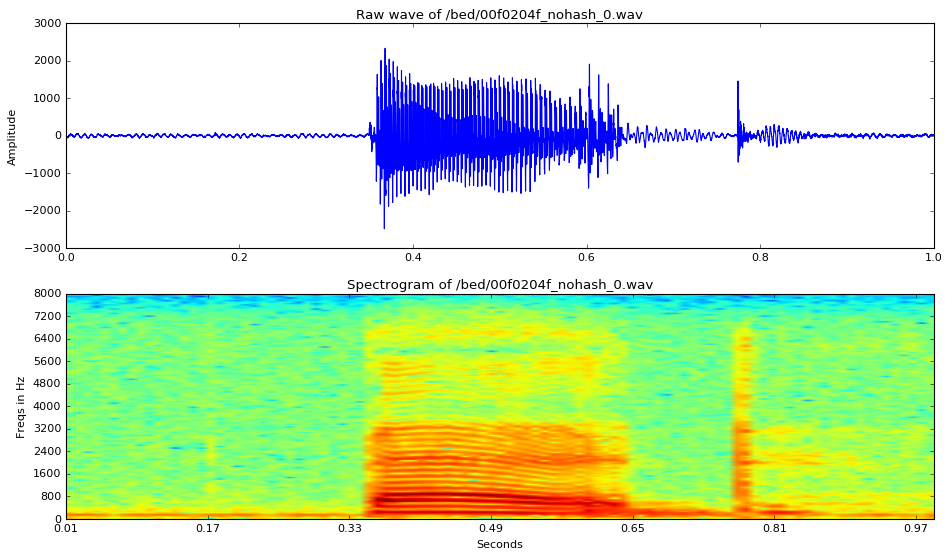

In [4]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [36]:
samples.shape
sample_rate

Last_HalfSampleRate = lambda x: x[-int(sample_rate/2):,:]

samplesReshape.shape

(1, 16000, 1)

In [ ]:
model = ks.models.Sequential() 
#batch_size = None
steps = None
input_dim = 1
ConvLayer     = ks.layers.Conv1D(1,int(sample_rate/2),input_shape = [steps, input_dim],activation="relu",padding='Same' )
LambdaLayer   = Lambda(Last_HalfSampleRate, output_shape= (int(sample_rate),1))

#zero padding 
PaddingLayer = ks.layers.convolutional.ZeroPadding1D(padding = (int(sample_rate/4),0))
ConvLayer2 = ks.layers.Conv1D(1,int(sample_rate/2), padding= 'Same')


#UpSampleLayer = ks.layers.convolutional.UpSampling1D(size = 2)

# Down sampling from 16,000 -> 1,000
# Up sampling from 1,000 -> 16,000


model.add(ConvLayer)
model.add(LambdaLayer)
#model.add(UpSampleLayer)
#model.add(PaddingLayer)
model.add(ConvLayer2)
model.compile(optimizer='sgd' , loss= 'mse')
model.fit(samplesReshape,samplesReshape)

model.summary()


# http://www.deeplearningbook.org/  -- Chapter 9, Read you dumb 


Epoch 1/10
1/1 [==============================] - 3s - loss: 201073.9062
Epoch 2/10
1/1 [==============================] - 3s - loss: 757774980395535388244967424.0000
Epoch 3/10
1/1 [==============================] - 3s - loss: inf
Epoch 4/10


In [35]:


x = lambda x: x[-1000:,:]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_49 (Conv1D)           (None, None, 1)           8001      
_________________________________________________________________
zero_padding1d_25 (ZeroPaddi (None, None, 1)           0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, None, 1)           8001      
Total params: 16,002
Trainable params: 16,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test = x(samples)

In [ ]:
test.shape